In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()
from cesium import datasets

# Returns
#     dict
#         Dictionary with attributes:
#             - times: list of (4096,) arrays of time values
#             - measurements: list of (4096,) arrays of measurement values
#             - classes: array of class labels for each time series
#             - archive: path to data archive
#             - header: path to header file

eeg = datasets.fetch_andrzejak()

print(eeg)

Loaded data from cached archive.


{'times': [array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02, ...,
       2.35884766e+01, 2.35942383e+01, 2.36000000e+01]), array([0.00000000e+00, 5.76171875e-03, 1.15234375e-02

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Norm

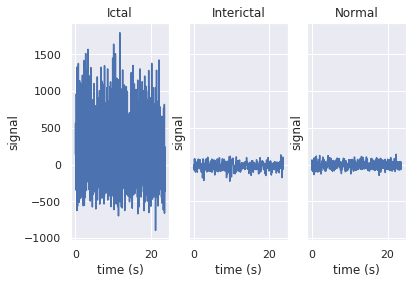

In [2]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names

eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

print(eeg["classes"])

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)
    
# print(eeg["times"][:10])
# print(eeg["measurements"][:10])

# eeg["classes"] = eeg["classes"][:10]
# eeg["times"] = eeg["times"][:10]
# eeg["measurements"] = eeg["measurements"][:10]

In [3]:
df = pd.DataFrame(eeg)
df = df.drop(columns=['archive', 'header'])
df['id'] = df.index

In [4]:
df.head()

times  \
0  [0.0, 0.00576171875, 0.0115234375, 0.017285156...   
1  [0.0, 0.00576171875, 0.0115234375, 0.017285156...   
2  [0.0, 0.00576171875, 0.0115234375, 0.017285156...   
3  [0.0, 0.00576171875, 0.0115234375, 0.017285156...   
4  [0.0, 0.00576171875, 0.0115234375, 0.017285156...   

                                        measurements classes  id  
0  [40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...  Normal   0  
1  [-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...  Normal   1  
2  [-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....  Normal   2  
3  [-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...  Normal   3  
4  [14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...  Normal   4

In [5]:
df_y = df.drop(columns=['times', 'measurements'])

In [6]:
df_y.head()

classes  id
0  Normal   0
1  Normal   1
2  Normal   2
3  Normal   3
4  Normal   4

In [7]:
data_all = []
i = 0

for x in range(4097):
    for index, row in df.iterrows():
            data = [row['times'][x], row['measurements'][x], row['id']]
            data_all.append(data)

In [8]:
df_x = pd.DataFrame(data_all, columns = ['time', 'measurement', 'id']) 
df_x = df_x.sort_values(by=['id', 'time'])
df_x = df_x.reset_index(drop=True)

In [10]:
df_x

time  measurement   id
0         0.000000         40.0    0
1         0.005762         48.0    0
2         0.011523         35.0    0
3         0.017285          5.0    0
4         0.023047        -40.0    0
5         0.028809        -54.0    0
6         0.034570        -32.0    0
7         0.040332          6.0    0
8         0.046094         36.0    0
9         0.051855         56.0    0
10        0.057617         64.0    0
11        0.063379         58.0    0
12        0.069141         40.0    0
13        0.074902         30.0    0
14        0.080664         -1.0    0
15        0.086426        -31.0    0
16        0.092188        -55.0    0
17        0.097949        -78.0    0
18        0.103711        -79.0    0
19        0.109473        -60.0    0
20        0.115234        -27.0    0
21        0.120996          6.0    0
22        0.126758         29.0    0
23        0.132520         47.0    0
24        0.138281         51.0    0
25        0.144043         40.0    0
26        0.149805         15.0    0
27        0.155566          4.0    0
28        0.161328        -20.0    0
29        0.167090        -36.0    0
...            ...          ...  ...
2048470  23.432910        414.0  499
2048471  23.438672        448.0  499
2048472  23.444434        486.0  499
2048473  23.450195        449.0  499
2048474  23.455957        291.0  499
2048475  23.461719        -46.0  499
2048476  23.467480       -457.0  499
2048477  23.473242       -878.0  499
2048478  23.479004      -1178.0  499
2048479  23.484766      -1324.0  499
2048480  23.490527      -1310.0  499
2048481  23.496289      -1105.0  499
2048482  23.502051       -770.0  499
2048483  23.507812       -345.0  499
2048484  23.513574         42.0  499
2048485  23.519336        315.0  499
2048486  23.525098        465.0  499
2048487  23.530859        513.0  499
2048488  23.536621        478.0  499
2048489  23.542383        378.0  499
2048490  23.548145        250.0  499
2048491  23.553906        137.0  499
2048492  23.559668         57.0  499
2048493  23.565430         17.0  499
2048494  23.571191          0.0  499
2048495  23.576953          7.0  499
2048496  23.582715         26.0  499
2048497  23.588477         57.0  499
2048498  23.594238         95.0  499
2048499  23.600000        462.0  499

[2048500 rows x 3 columns]

In [11]:
from tsfresh import extract_features
extracted_features = extract_features(df_x, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 72/72 [32:51<00:00, 11.56s/it]   


In [15]:
extracted_features

variable  measurement__abs_energy  measurement__absolute_sum_of_changes  \
id                                                                        
0                    6.760553e+06                               46948.0   
1                    2.103041e+07                               61118.0   
2                    9.767461e+06                               51269.0   
3                    9.143449e+06                               75014.0   
4                    9.590945e+06                               52873.0   
5                    1.147638e+07                               52734.0   
6                    9.495812e+06                               63591.0   
7                    4.416482e+06                               41753.0   
8                    4.335177e+06                               32107.0   
9                    1.089314e+07                               36728.0   
10                   6.804282e+06                               39595.0   
11                   7.273209e+06                               36972.0   
12                   4.582312e+06                               31052.0   
13                   7.530917e+06                               35336.0   
14                   3.206269e+06                               30412.0   
15                   9.200739e+06                               49515.0   
16                   3.954442e+06                               31131.0   
17                   1.246361e+07                               59274.0   
18                   4.232351e+06                               29660.0   
19                   2.901078e+06                               35257.0   
20                   3.605871e+06                               31739.0   
21                   3.666230e+06                               30154.0   
22                   1.042600e+07                               67918.0   
23                   5.478599e+06                               71496.0   
24                   1.077405e+07                               53044.0   
25                   1.363502e+07                               74780.0   
26                   6.467976e+06                               69727.0   
27                   1.455053e+07                               34758.0   
28                   7.437625e+06                               71436.0   
29                   2.445204e+07                              108246.0   
..                            ...                                   ...   
470                  8.973239e+08                              545980.0   
471                  1.524108e+08                              123173.0   
472                  9.345463e+08                              375527.0   
473                  1.176634e+09                              706507.0   
474                  2.031224e+08                              199956.0   
475                  5.404408e+08                              283855.0   
476                  3.572451e+08                              311537.0   
477                  1.891915e+08                              206894.0   
478                  1.567882e+08                              201432.0   
479                  6.298399e+07                               87770.0   
480                  1.538095e+08                              216483.0   
481                  8.407769e+08                              367367.0   
482                  8.962128e+07                              105597.0   
483                  1.437010e+09                              727329.0   
484                  4.589142e+07                               47786.0   
485                  1.869527e+08                              132806.0   
486                  9.507109e+07                              112509.0   
487                  1.197676e+09                              572745.0   
488                  9.484627e+08                              374097.0   
489                  2.754192e+08                              244182.0   
490                  1.22

In [16]:
list(extracted_features)

['measurement__abs_energy',
 'measurement__absolute_sum_of_changes',
 'measurement__agg_autocorrelation__f_agg_"mean"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"median"__maxlag_40',
 'measurement__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
 'measurement__agg_linear_trend__f_agg_"max"__chunk_le

In [22]:
# Convert df_y to a numpy array.
# y = df_y.values
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df_y['classes'])
list(label_encoder.classes_)

['Ictal', 'Interictal', 'Normal']

In [42]:
df_y['class_numerical'] = label_encoder.transform(df_y['classes'])
df_y = df_y.drop(columns=['classes', 'id'])

In [55]:
# Convert to numpy array.
y = df_y['class_numerical'].values

In [57]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [58]:
features_filtered

variable  measurement__approximate_entropy__m_2__r_0.5  \
id                                                       
0                                             0.523761   
1                                             0.553673   
2                                             0.511752   
3                                             0.700123   
4                                             0.541857   
5                                             0.534856   
6                                             0.578076   
7                                             0.553831   
8                                             0.487904   
9                                             0.419308   
10                                            0.479660   
11                                            0.456773   
12                                            0.455278   
13                                            0.401959   
14                                            0.527906   
15                                            0.499798   
16                                            0.508052   
17                                            0.521972   
18                                            0.460882   
19                                            0.590622   
20                                            0.511054   
21                                            0.494080   
22                                            0.592233   
23                                            0.844604   
24                                            0.493075   
25                                            0.610357   
26                                            0.644341   
27                                            0.501470   
28                                            0.739368   
29                                            0.882379   
..                                                 ...   
470                                           0.456151   
471                                           0.336439   
472                                           0.366682   
473                                           0.517038   
474                                           0.365459   
475                                           0.329422   
476                                           0.503915   
477                                           0.407944   
478                                           0.435292   
479                                           0.295056   
480                                           0.425732   
481                                           0.327530   
482                                           0.304954   
483                                           0.521143   
484                                           0.233073   
485                                           0.315884   
486                                           0.372175   
487                                           0.282543   
488                                           0.264398   
489                                           0.423231   
490                                           0.470834   
491                                           0.432474   
492                                           0.345850   
493                                           0.309229   
494                                           0.412023   
495                                           0.337630   
496                                           0.428877   
497                                           0.463474   
498                                           0.506560   
499                                           0.388753   

variable  measurement__approximate_entropy__m_2__r_0.7  \
id                                                       
0                                             0.382582   
1                                             0.412340   
2                                             0.359989   
3                                             0.514806 

In [60]:
list(features_filtered)

['measurement__approximate_entropy__m_2__r_0.5',
 'measurement__approximate_entropy__m_2__r_0.7',
 'measurement__friedrich_coefficients__m_3__r_30__coeff_1',
 'measurement__number_peaks__n_10',
 'measurement__approximate_entropy__m_2__r_0.3',
 'measurement__approximate_entropy__m_2__r_0.9',
 'measurement__number_cwt_peaks__n_5',
 'measurement__number_peaks__n_5',
 'measurement__partial_autocorrelation__lag_1',
 'measurement__autocorrelation__lag_1',
 'measurement__cid_ce__normalize_True',
 'measurement__number_peaks__n_3',
 'measurement__autocorrelation__lag_2',
 'measurement__autocorrelation__lag_3',
 'measurement__partial_autocorrelation__lag_9',
 'measurement__autocorrelation__lag_4',
 'measurement__approximate_entropy__m_2__r_0.1',
 'measurement__autocorrelation__lag_5',
 'measurement__spkt_welch_density__coeff_5',
 'measurement__fft_aggregated__aggtype_"centroid"',
 'measurement__autocorrelation__lag_6',
 'measurement__number_crossing_m__m_-1',
 'measurement__number_crossing_m__m_

Featurization
-------------
Once the data is loaded, we can generate features for each time series using the
|cesium.featurize|_ module. The ``featurize`` module includes many built-in
choices of features which can be applied for any type of time series data;
here we've chosen a few generic features that do not have any special
biological significance.

By default, the time series will featurized in parallel using the
``dask.threaded`` scheduler; other approaches, including serial and
distributed approaches, can be implemented by passing in other ``dask``
schedulers as the ``get`` argument to ``featurize_time_series``.

.. |cesium.featurize| replace:: ``cesium.featurize``



In [10]:
corr_matrix = fset_cesium.corr()
print(corr_matrix)

feature                           amplitude   maximum percent_beyond_1_std  \
channel                                   0         0                    0   
feature                   channel                                            
amplitude                 0        1.000000  0.716923            -0.882882   
maximum                   0        0.716923  1.000000            -0.591502   
percent_beyond_1_std      0       -0.882882 -0.591502             1.000000   
max_slope                 0        0.942585  0.764327            -0.823043   
median                    0       -0.651036  0.035592             0.585524   
median_absolute_deviation 0        0.892147  0.726974            -0.794916   
percent_close_to_median   0        0.736874  0.348481            -0.626271   
minimum                   0       -0.934176 -0.420979             0.845985   
skew                      0       -0.085383 -0.266489            -0.068416   
std                       0        0.888630  0.673518           

In [9]:
import warnings
warnings.filterwarnings('ignore')

#correlation - simplify use 3 instead of 8 features, etc.
#1d convolusional NN
#keras!!! LR


#build correlation coefficient between 2 variables

from cesium import featurize
features_to_use = ["amplitude",
                   "maximum",
                   "percent_beyond_1_std",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]
fset_cesium = featurize.featurize_time_series(times=eeg["times"],
                                              values=eeg["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use)
print(fset_cesium.head())

feature amplitude maximum percent_beyond_1_std     max_slope median  \
channel         0       0                    0             0      0   
0           143.5   141.0             0.327313  11107.796610   -4.0   
1           211.5   169.0             0.290212  20653.559322  -51.0   
2           165.0   184.0             0.302660  13537.627119   13.0   
3           171.5   162.0             0.300952  17008.813559   -4.0   
4           170.0   152.0             0.305101  13016.949153  -18.0   

feature median_absolute_deviation percent_close_to_median minimum      skew  \
channel                         0                       0       0         0   
0                            28.0                0.505004  -146.0  0.032805   
1                            32.0                0.640469  -254.0 -0.092715   
2                            31.0                0.515987  -146.0 -0.004100   
3                            31.0                0.541128  -181.0  0.063678   
4                           

In [11]:
# List all values with high correlation
corr_matrix = fset_cesium.corr().abs()
high_corr_var=np.where(corr_matrix > 0.5)
high_corr_var=[(corr_matrix.columns[x][0],corr_matrix.columns[y][0]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print(high_corr_var)

#add everything in first to keep, second to remove. remove "remove" from keep.

[('amplitude', 'maximum'), ('amplitude', 'percent_beyond_1_std'), ('amplitude', 'max_slope'), ('amplitude', 'median'), ('amplitude', 'median_absolute_deviation'), ('amplitude', 'percent_close_to_median'), ('amplitude', 'minimum'), ('amplitude', 'std'), ('amplitude', 'weighted_average'), ('maximum', 'percent_beyond_1_std'), ('maximum', 'max_slope'), ('maximum', 'median_absolute_deviation'), ('maximum', 'std'), ('percent_beyond_1_std', 'max_slope'), ('percent_beyond_1_std', 'median'), ('percent_beyond_1_std', 'median_absolute_deviation'), ('percent_beyond_1_std', 'percent_close_to_median'), ('percent_beyond_1_std', 'minimum'), ('percent_beyond_1_std', 'std'), ('percent_beyond_1_std', 'weighted_average'), ('max_slope', 'median'), ('max_slope', 'median_absolute_deviation'), ('max_slope', 'percent_close_to_median'), ('max_slope', 'minimum'), ('max_slope', 'std'), ('max_slope', 'weighted_average'), ('median', 'percent_close_to_median'), ('median', 'minimum'), ('median', 'weighted_average'), 

In [12]:
high_corr_var_6=np.where(corr_matrix > 0.6)
high_corr_var_6=[(corr_matrix.columns[x][0],corr_matrix.columns[y][0]) for x,y in zip(*high_corr_var_6) if x!=y and x<y]

print(high_corr_var_6)

[('amplitude', 'maximum'), ('amplitude', 'percent_beyond_1_std'), ('amplitude', 'max_slope'), ('amplitude', 'median'), ('amplitude', 'median_absolute_deviation'), ('amplitude', 'percent_close_to_median'), ('amplitude', 'minimum'), ('amplitude', 'std'), ('amplitude', 'weighted_average'), ('maximum', 'max_slope'), ('maximum', 'median_absolute_deviation'), ('maximum', 'std'), ('percent_beyond_1_std', 'max_slope'), ('percent_beyond_1_std', 'median_absolute_deviation'), ('percent_beyond_1_std', 'percent_close_to_median'), ('percent_beyond_1_std', 'minimum'), ('percent_beyond_1_std', 'std'), ('max_slope', 'median_absolute_deviation'), ('max_slope', 'percent_close_to_median'), ('max_slope', 'minimum'), ('max_slope', 'std'), ('median', 'percent_close_to_median'), ('median', 'minimum'), ('median', 'weighted_average'), ('median_absolute_deviation', 'minimum'), ('median_absolute_deviation', 'std'), ('percent_close_to_median', 'minimum'), ('percent_close_to_median', 'weighted_average'), ('minimum'

In [13]:
high_corr_var_7=np.where(corr_matrix > 0.7)
high_corr_var_7=[(corr_matrix.columns[x][0],corr_matrix.columns[y][0]) for x,y in zip(*high_corr_var_7) if x!=y and x<y]

print(high_corr_var_7)

[('amplitude', 'maximum'), ('amplitude', 'percent_beyond_1_std'), ('amplitude', 'max_slope'), ('amplitude', 'median_absolute_deviation'), ('amplitude', 'percent_close_to_median'), ('amplitude', 'minimum'), ('amplitude', 'std'), ('maximum', 'max_slope'), ('maximum', 'median_absolute_deviation'), ('percent_beyond_1_std', 'max_slope'), ('percent_beyond_1_std', 'median_absolute_deviation'), ('percent_beyond_1_std', 'minimum'), ('percent_beyond_1_std', 'std'), ('max_slope', 'median_absolute_deviation'), ('max_slope', 'percent_close_to_median'), ('max_slope', 'minimum'), ('max_slope', 'std'), ('median', 'percent_close_to_median'), ('median', 'minimum'), ('median', 'weighted_average'), ('median_absolute_deviation', 'minimum'), ('median_absolute_deviation', 'std'), ('percent_close_to_median', 'minimum'), ('percent_close_to_median', 'weighted_average'), ('minimum', 'std'), ('minimum', 'weighted_average')]


In [ ]:
#                List ["amplitude",
#                    "median",
#                    "skew",                   
#                    "weighted_average"]

The output of ``featurize_time_series`` is a ``pandas.DataFrame`` which contains all
the feature information needed to train a machine learning model: feature
names are stored as column indices (as well as channel numbers, as we'll see
later for multi-channel data), and the time series index/class label are
stored as row indices.



Custom feature functions
~~~~~~~~~~~~~~~~~~~~~~~~
Custom feature functions not built into ``cesium`` may be passed in using the
``custom_functions`` keyword, either as a dictionary ``{feature_name: function}``, or as a
`dask graph <http://dask.pydata.org/en/latest/custom-graphs.html>`_. Functions should take
three arrays ``times, measurements, errors`` as inputs; details can be found in the
``cesium.featurize``
`documentation <http://cesium-ml.org/docs/api/cesium.featurize.html>`_.
Here we'll compute five standard features for EEG analysis provided by
`Guo et al. (2012) <http://linkinghub.elsevier.com/retrieve/pii/S0957417411003253)>`_:



In [27]:
import numpy as np
import scipy.stats

def mean_signal(t, m, e):
    return np.mean(m)

# def std_signal(t, m, e):
#     return np.std(m)

# def mean_square_signal(t, m, e):
#     return np.mean(m ** 2)

# def abs_diffs_signal(t, m, e):
#     return np.sum(np.abs(np.diff(m)))

# def skew_signal(t, m, e):
#     return scipy.stats.skew(m)

Now we'll pass the desired feature functions as a dictionary via the
``custom_functions`` keyword argument.



In [30]:
guo_features = {
    "mean": mean_signal,
#     "std": std_signal,
#     "mean2": mean_square_signal,
#     "abs_diffs": abs_diffs_signal,
#     "skew": skew_signal
}

fset_guo = featurize.featurize_time_series(times=eeg["times"], values=eeg["measurements"],
                                           errors=None,
                                           features_to_use=list(guo_features.keys()),
                                           custom_functions=guo_features)
print(fset_guo.head())

feature       mean
channel          0
0        -4.132048
1       -52.444716
2        12.705150
3        -3.992433
4       -17.999268


Multi-channel time series
~~~~~~~~~~~~~~~~~~~~~~~~~
The EEG time series considered here consist of univariate signal measurements along a
uniform time grid. But ``featurize_time_series`` also accepts multi-channel
data; to demonstrate this, we will decompose each signal into five frequency
bands using a discrete wavelet transform as suggested by
`Subasi (2005) <http://www.sciencedirect.com/science/article/pii/S0957417404001745>`_,
and then featurize each band separately using the five functions from above.



In [31]:
import pywt

n_channels = 5
eeg["dwts"] = [pywt.wavedec(m, pywt.Wavelet("db1"), level=n_channels-1)
               for m in eeg["measurements"]]
fset_dwt = featurize.featurize_time_series(times=None, values=eeg["dwts"], errors=None,
                                           features_to_use=list(guo_features.keys()),
                                           custom_functions=guo_features)
print(fset_dwt.head())

feature        mean                                        
channel           0         1         2         3         4
0        -17.080739 -6.067121 -0.979336  0.154634  0.035545
1       -210.210117 -3.743191  0.511377  0.057561 -0.024847
2         51.831712  0.714981  0.247418 -0.101951  0.007937
3        -15.429961  9.348249 -0.099243 -0.228293  0.181522
4        -71.982490 -3.787938 -0.183324 -0.034146 -0.048314


The output featureset has the same form as before, except now the ``channel``
component of the column index is used to index the features by the
corresponding frequency band.



Model Building
--------------
Featuresets produced by ``cesium.featurize`` are compatible with the ``scikit-learn``
API. For this example, we'll test a random forest classifier for the
built-in ``cesium`` features, and a 3-nearest neighbors classifier for the
others, as suggested by
`Guo et al. (2012) <http://linkinghub.elsevier.com/retrieve/pii/S0957417411003253>`_.



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(np.arange(len(eeg["classes"])), random_state=0)

model_cesium = RandomForestClassifier(n_estimators=128, max_features="auto",
                                      random_state=0)
model_cesium.fit(fset_cesium.iloc[train], eeg["classes"][train])

model_guo = KNeighborsClassifier(3)
model_guo.fit(fset_guo.iloc[train], eeg["classes"][train])

model_dwt = KNeighborsClassifier(3)
model_dwt.fit(fset_dwt.iloc[train], eeg["classes"][train])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Prediction
----------
Making predictions for new time series based on these models follows the same
pattern: first the time series are featurized using ``featurize_time_series``,
and then predictions are made based on these features using the ``predict``
method of the ``scikit-learn`` model.



In [35]:
from sklearn.metrics import accuracy_score

preds_cesium = model_cesium.predict(fset_cesium)
preds_guo = model_guo.predict(fset_guo)
preds_dwt = model_dwt.predict(fset_dwt)

print("Built-in cesium features: training accuracy={:.2%}, test accuracy={:.2%}".format(
          accuracy_score(preds_cesium[train], eeg["classes"][train]),
          accuracy_score(preds_cesium[test], eeg["classes"][test])))
print("Guo et al. features: training accuracy={:.2%}, test accuracy={:.2%}".format(
          accuracy_score(preds_guo[train], eeg["classes"][train]),
          accuracy_score(preds_guo[test], eeg["classes"][test])))
print("Wavelet transform features: training accuracy={:.2%}, test accuracy={:.2%}".format(
          accuracy_score(preds_dwt[train], eeg["classes"][train]),
          accuracy_score(preds_dwt[test], eeg["classes"][test])))

Built-in cesium features: training accuracy=100.00%, test accuracy=100.00%
Guo et al. features: training accuracy=100.00%, test accuracy=100.00%
Wavelet transform features: training accuracy=100.00%, test accuracy=100.00%


The workflow presented here is intentionally simplistic and omits many important steps
such as feature selection, model parameter selection, etc., which may all be
incorporated just as they would for any other ``scikit-learn`` analysis.
But with essentially three function calls (``featurize_time_series``,
``model.fit``, and ``model.predict``), we are able to build a
model from a set of time series and make predictions on new, unlabeled data. In
upcoming posts we'll introduce the web frontend for ``cesium`` and describe how
the same analysis can be performed in a browser with no setup or coding required.

